Morphological transformations are simple operations based on the image shape. It is performed on binary images - we need to pass structuring element or kernel which decides the nature of operation:
- Erosion
- Dilation

1. Erosion - kernel slides through the image, the original pixel will be 1 only if all pixels under the kernel is 1, otherwise - 0

2. Dilation - value is 1 if at least one pixel under the kernel is 1

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

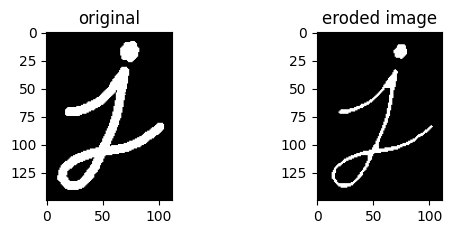

In [2]:
img = cv2.imread('./assets/j.png', cv2.IMREAD_GRAYSCALE)

kernel = np.ones(shape=(5, 5), dtype=np.uint8)
erosion = cv2.erode(src=img, kernel=kernel, iterations=1)
plt.subplot(221)
plt.imshow(img, cmap='gray')
plt.title('original')
plt.subplot(222)
plt.imshow(erosion, cmap='gray')
plt.title('eroded image')
plt.show()

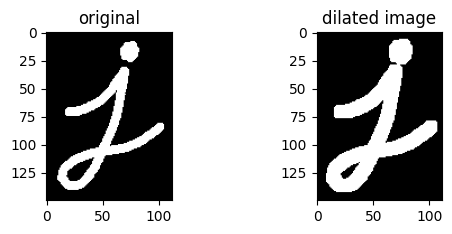

In [4]:
kernel = np.ones(shape=(5, 5), dtype=np.uint8)
dilation = cv2.dilate(src=img, kernel=kernel, iterations=1)

plt.subplot(221)
plt.imshow(img, cmap='gray')
plt.title('original')
plt.subplot(222)
plt.imshow(dilation, cmap='gray')
plt.title('dilated image')
plt.show()

Opening:
1. Errosion followed by dilation - noise removal

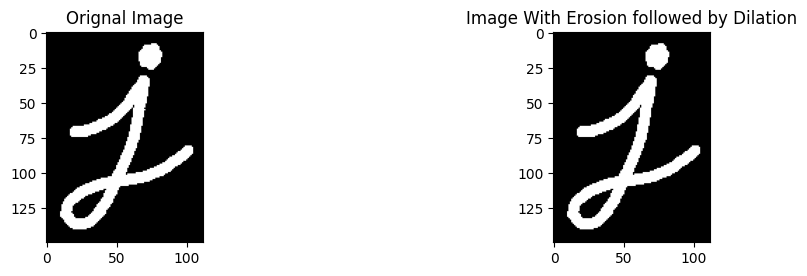

In [5]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

plt.figure(figsize=(12, 6))
plt.subplot(221)
plt.imshow(img, cmap='gray')
plt.title('Orignal Image')
plt.subplot(222)
plt.imshow(opening, cmap='gray')
plt.title('Image With Erosion followed by Dilation')

plt.show()

Closing - reverse of opening, dilation followed by erosion - closes small holes inside the foreground object

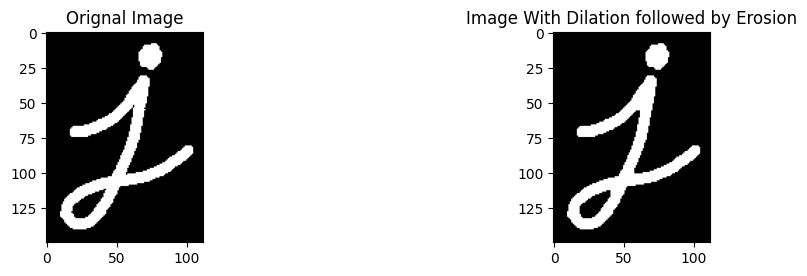

In [6]:
kernel = np.ones((3,3),np.uint8)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(12, 6))
plt.subplot(221), plt.imshow(img, cmap='gray'), plt.title('Orignal Image')
plt.subplot(222), plt.imshow(closing, cmap='gray'), plt.title('Image With Dilation followed by Erosion')
plt.show()

Morphological gradient - difference between dilation and erosion - outlines the object

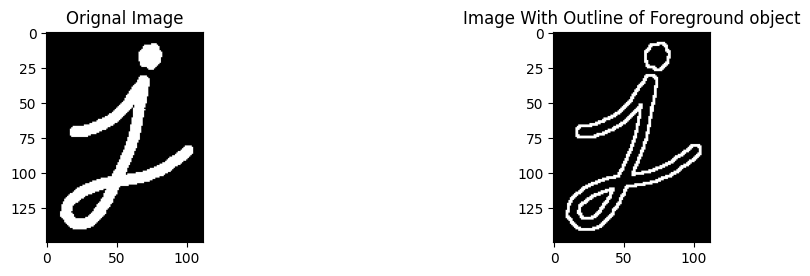

In [7]:
kernel = np.ones((3,3),np.uint8)
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

plt.figure(figsize=(12, 6))
plt.subplot(221), plt.imshow(img, cmap='gray'), plt.title('Orignal Image')
plt.subplot(222), plt.imshow(gradient, cmap='gray'), plt.title('Image With Outline of Foreground object')
plt.show()

Top hat - difference between input image and opening of the image

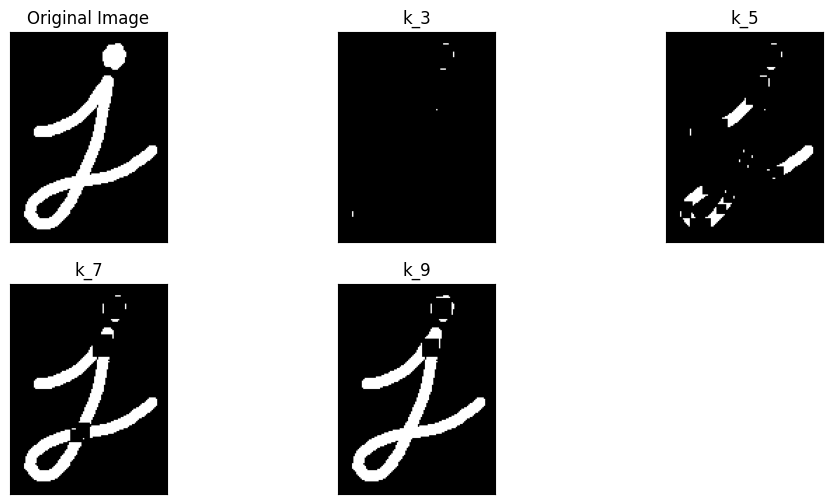

In [8]:
k = [5,7,9,11]
tophat = []
for i in range(len(k)):
    kernel = np.ones((k[i],k[i]),np.uint8)
    tophat.append(cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel))

titles = ['Original Image','k_3', 'k_5', 'k_7', 'k_9']
images = [img] + tophat

plt.figure(figsize=(12, 6))
for i in range(len(titles)):
    plt.subplot(2,3,i+1),plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()